# Milestone 2 - Group 1041 (Matthew Currie, Jivraj , Livia)

## Medical Cost Database Research Questions

Our Data Set comes from Brett Lantz's book, _Machine Learning with R_. It contains 6 columns: 

<!-- These are coming from the README.md file we have in the main directory -->
1. Does medical cost increase with age?
2. Does having children increase one's medical costs?
3. Do men with High BMI's face higher medical costs than women with High BMI's?
4. Do medical costs vary with region and sex?


In [1]:
import sys
sys.path.append("../scripts")
from project_functions import load_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PATH = "../../data/raw/Medical_Cost.csv"

In [2]:
# First Load our data
df = load_data(
    PATH
)

### Research Question 1: Does a higher age correlate with higher medical costs?

To start our analysis, we will begin by plotting age and medical charges on a scatter plot. This should be able to give us a clear view of what trends may exist within our data, albeit it might look a little messy. 

<AxesSubplot:xlabel='age', ylabel='charges'>

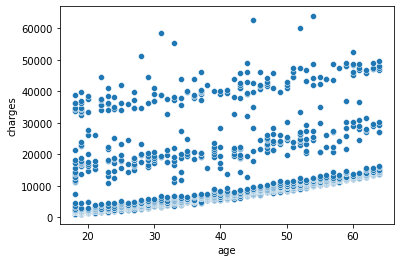

In [3]:
sns.scatterplot(data=df, x='age', y='charges')

What the above graph illustrates is that, while all ages have cases of high medical costs, there is a linear trend with medical costs rising as one ages. This makes sense intuitively because, as people get older, they become more susceptible certain medical conditions.

Let's break this down into a bar chart to get a better view of the costs as a general average.

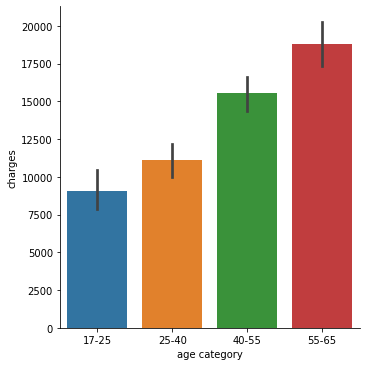

In [4]:
sns.catplot(x='age category', y='charges', kind='bar', data=df)

And what do you know! The linear trend can be seen again with as one ages, so does their medical cost.

Let's go back to the scatter plot, but this time let's differentiate which data points are smokers and which are non smokers.

<AxesSubplot:xlabel='age', ylabel='charges'>

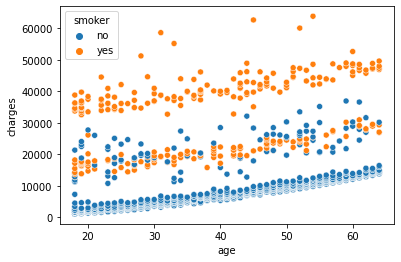

In [5]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')

Yikes! Smoking is not good for you at all! 

Something interesting is that it looks like smokers account for nearly every data point with a high medical cost. Let's return to look deeper into this later, specifically Research Question 5.

### Research Question 2: Does having children increase one's medical costs?

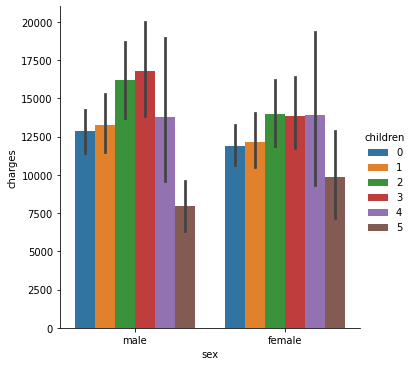

In [6]:
sns.catplot(data=df, x='sex', y='charges', hue='children', kind='bar')

### Research Question 3: Do men with High BMI's face higher medical costs than women with High BMI's?

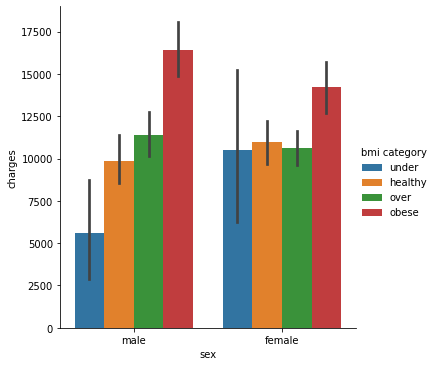

In [7]:
sns.catplot(data=df, x='sex', y='charges', hue='bmi category', kind='bar')

### Research Question 4: Do medical costs vary with region and sex?

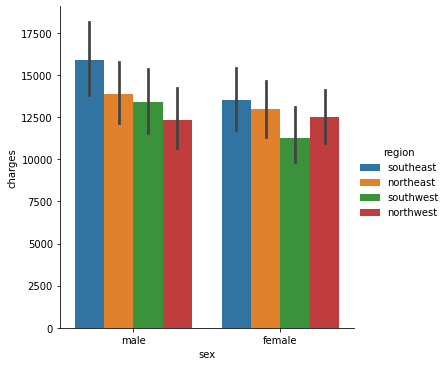

In [8]:
sns.catplot(data=df, x='sex', y='charges', hue='region', kind='bar')

### Research Question 5: How does being a smoker effect your medical costs?

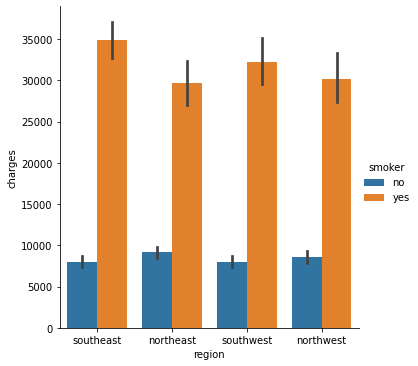

In [9]:
sns.catplot(x='region', y='charges', hue='smoker', kind='bar', data=df)

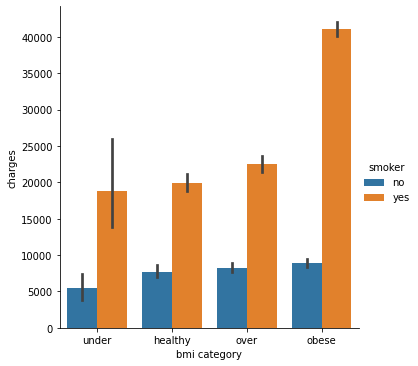

In [10]:
sns.catplot(x='bmi category', y='charges', hue='smoker', kind='bar', data=df)

<AxesSubplot:xlabel='cost category', ylabel='count'>

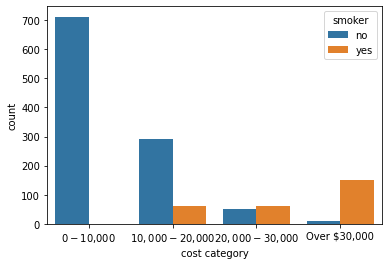

In [12]:
sns.countplot(data=df, x='cost category', hue='smoker')